In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import dhlab.graph_networkx_louvain as gnl

In [6]:
ndt_all = pd.read_csv("ndt.csv")

In [17]:
with open('andres setninger.txt','w', encoding='utf-8') as f:
    for s in ndt_all[ndt_all.language_code=="nb-NO"].groupby('sentence_string').count().index:
        f.write(s)
        f.write('\n')

In [3]:
ndt_nob = pd.read_csv('NDT/ndt_nob.csv', index_col = 0)

In [4]:
ndt_nob

,token_id,token_order,form,lemma,pos,feats,head,deprel,sent_id,ud_id,language_code,data_split,newpar,document_id
0,1,1,Lam,lam,subst,appell|nøyt|ub|ent,0.0,FRAG,1.0,1.0,nb-NO,train,0.0,NaN
1,2,2,og,og,konj,<ikke-clb>,3.0,KONJ,1.0,1.0,nb-NO,train,0.0,NaN
2,3,3,piggvar,piggvar,subst,appell|mask|ub|ent,1.0,KOORD,1.0,1.0,nb-NO,train,0.0,NaN
3,4,4,på,på,prep,NaN,1.0,SPRED,1.0,1.0,nb-NO,train,0.0,NaN
4,5,5,bryllupsmenyen,bryllupsmeny,subst,appell|mask|be|ent|samset,4.0,PUTFYLL,1.0,1.0,nb-NO,train,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70344,70345,2,både,både,konj,<ikke-clb>|<adv>,3.0,KONJ,4310.0,4310.0,nb-NO,train,0.0,NaN
70345,70346,3,nikotin-,nikotin-,subst,ufl,6.0,SUBJ,4310.0,4310.0,nb-NO,train,0.0,NaN
70346,70347,4,og,og,konj,<ikke-clb>,5.0,KONJ,4310.0,4310.0,nb-NO,train,0.0,NaN
70347,70348,5,THC-innholdet,THC-innhold,subst,appell|nøyt|be|ent|samset,3.0,KOORD,4310.0,4310.0,nb-NO,train,0.0,NaN


In [321]:
ndt_all.columns

Index(['token_id', 'token_order', 'form', 'lemma', 'pos', 'feats', 'head',
       'deprel', 'sent_id', 'ud_id', 'sentence_string', 'language_code',
       'data_split', 'newpar', 'document_id'],
      dtype='object')

In [325]:
ndt_red = ndt_all[['token_id', 'token_order', 'form', 'lemma', 'pos', 'feats', 'head',
       'deprel', 'sent_id', 'ud_id', 'language_code',
       'data_split', 'newpar', 'document_id']]

In [326]:
ndt_red.to_csv("NDT/ndt_all_reduce.csv")

In [33]:
#ndt_nob.columns = "index fullform lemma pos pos1 feature head rel n m".split()

In [34]:
#ndt_nob['sentence_id'] = 1

In [327]:
ndt_nob = ndt_red[ndt_red.language_code == 'nb-NO']

In [323]:
ndt_all

,token_id,token_order,form,lemma,pos,feats,head,deprel,sent_id,ud_id,sentence_string,language_code,data_split,newpar,document_id
0,1,1,Lam,lam,subst,appell|nøyt|ub|ent,0,FRAG,1,1,Lam og piggvar på bryllupsmenyen,nb-NO,train,0,NaN
1,2,2,og,og,konj,<ikke-clb>,3,KONJ,1,1,Lam og piggvar på bryllupsmenyen,nb-NO,train,0,NaN
2,3,3,piggvar,piggvar,subst,appell|mask|ub|ent,1,KOORD,1,1,Lam og piggvar på bryllupsmenyen,nb-NO,train,0,NaN
3,4,4,på,på,prep,NaN,1,SPRED,1,1,Lam og piggvar på bryllupsmenyen,nb-NO,train,0,NaN
4,5,5,bryllupsmenyen,bryllupsmeny,subst,appell|mask|be|ent|samset,4,PUTFYLL,1,1,Lam og piggvar på bryllupsmenyen,nb-NO,train,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614367,614368,13,dyra,dyr,subst,nøyt|appell|fl|bu,12,PUTFYLL,37619,17575,Ut av dataa kan ein sjå mykje om beiteforholde...,nn-NO,test,0,NaN
614368,614369,14,",","$,",<komma>,NaN,4,IK,37619,17575,Ut av dataa kan ein sjå mykje om beiteforholde...,nn-NO,test,0,NaN
614369,614370,15,avsluttar,avslutte,verb,pres,4,PAR,37619,17575,Ut av dataa kan ein sjå mykje om beiteforholde...,nn-NO,test,0,NaN
614370,614371,16,Ekre,Ekre,subst,prop,15,SUBJ,37619,17575,Ut av dataa kan ein sjå mykje om beiteforholde...,nn-NO,test,0,NaN


<AxesSubplot:xlabel='pos'>

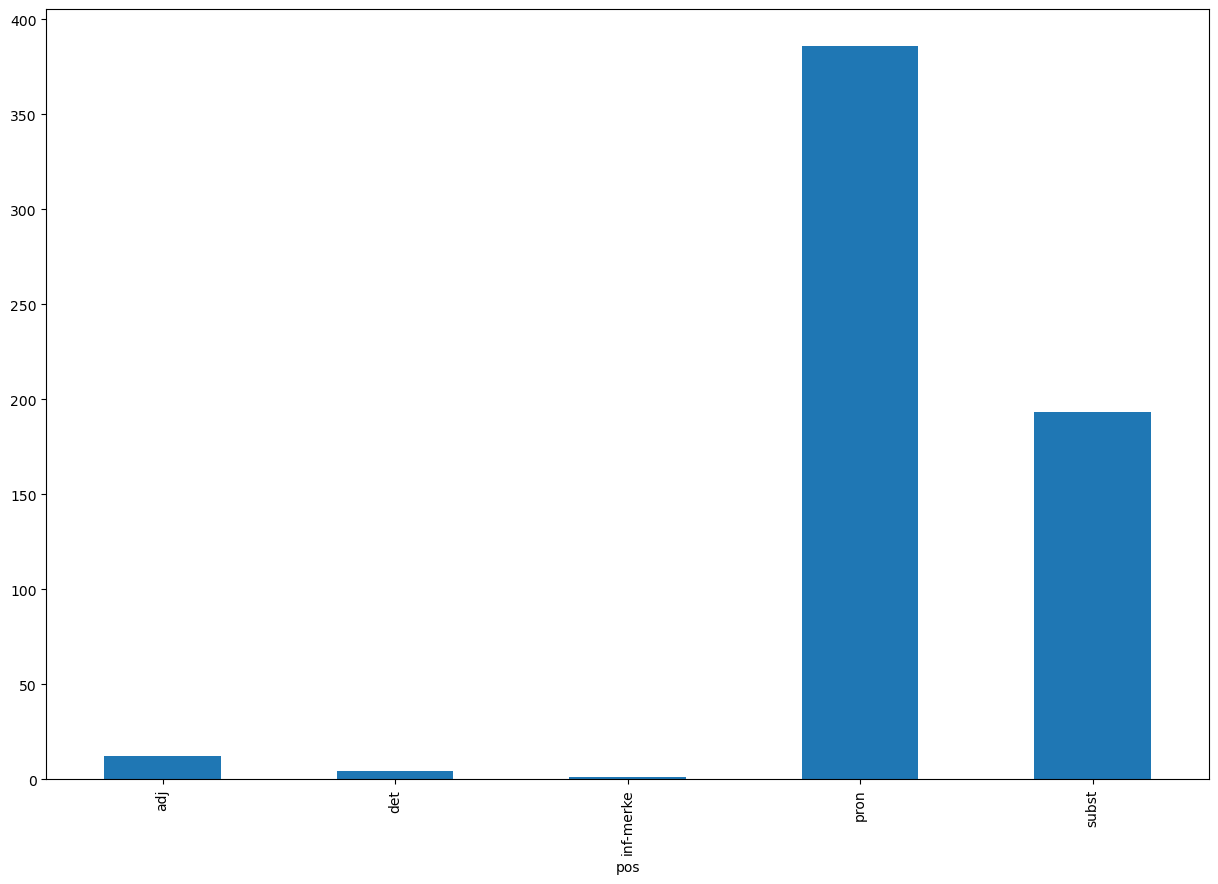

In [328]:
ndt_nob[ndt_nob['deprel'].isin(['IOBJ'])].groupby('pos')['token_id'].count().plot(kind='bar')

In [329]:
ndt_nob.columns[3]

'lemma'

<AxesSubplot:xlabel='pos'>

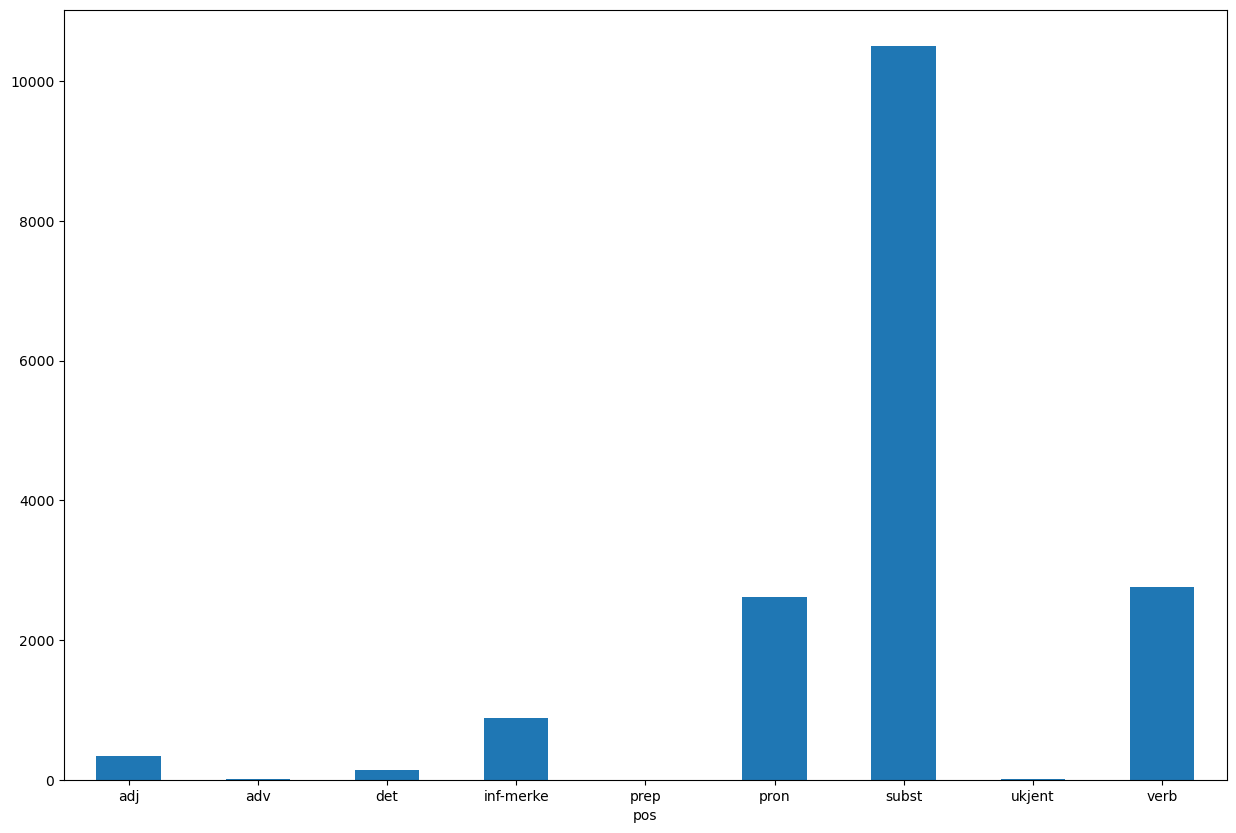

In [330]:
ndt_nob[ndt_nob['deprel'].isin(['DOBJ'])].groupby('pos')['token_id'].count().plot(kind='bar', rot = 0)

<AxesSubplot:xlabel='pos'>

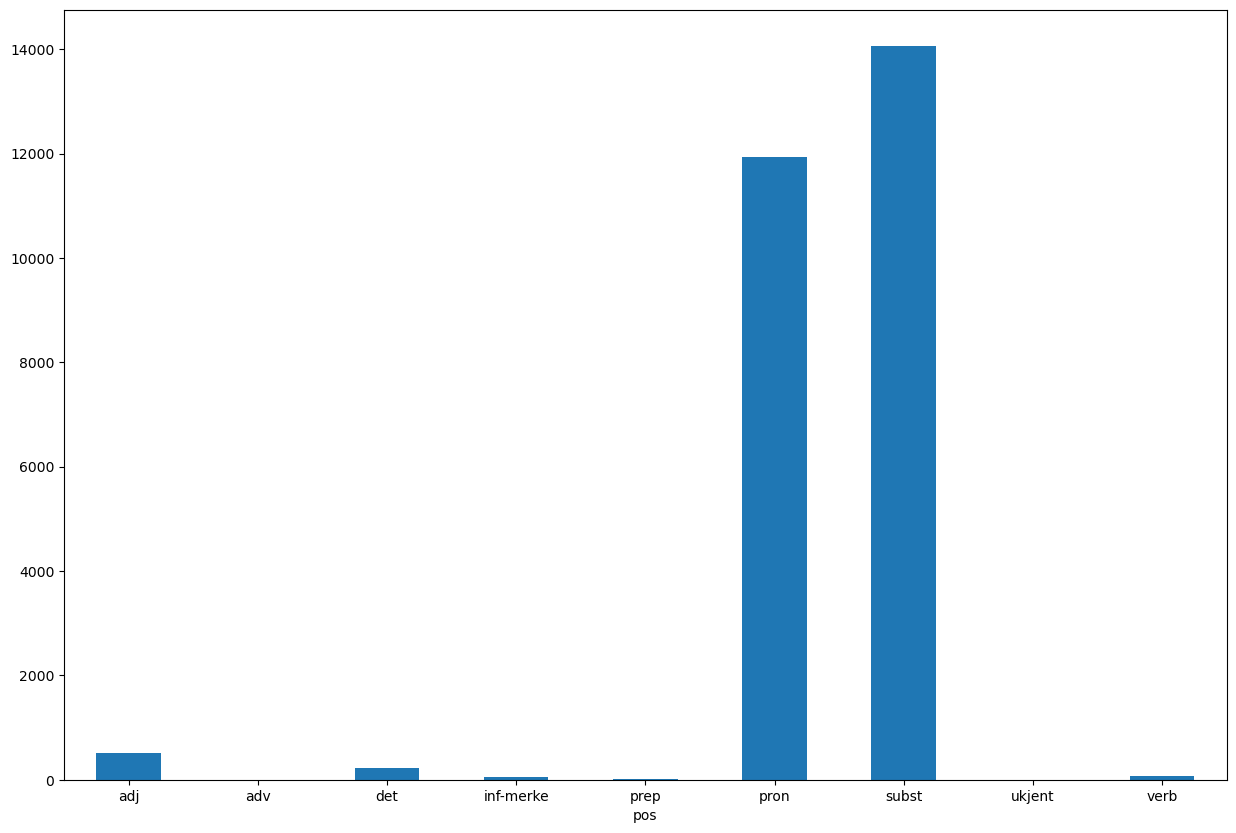

In [331]:
ndt_nob[ndt_nob['deprel'].isin(['SUBJ'])].groupby('pos')['token_id'].count().plot(kind='bar', rot = 0)

<AxesSubplot:xlabel='3'>

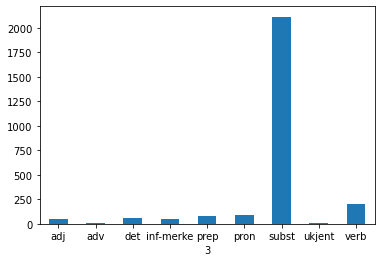

In [150]:
ndt_nob[ndt_nob[7].isin(['APP'])].groupby(3)[0].count().plot(kind='bar', rot = 0)

In [332]:
dist = ndt_nob[['deprel','head','token_order']].dropna()

In [333]:
dist.head(20)

,deprel,head,token_order
0,FRAG,0,1
1,KONJ,3,2
2,KOORD,1,3
3,SPRED,1,4
4,PUTFYLL,4,5
5,IP,1,6
6,SUBJ,6,1
7,IK,1,2
8,KOORD,1,3
9,KONJ,5,4


ndt = pd.DataFrame(columns = ['rel', 'head', 'dep'])
ndt['dep'] = dist[6].astype(int)
ndt['head'] = dist[0].astype(int)
ndt['rel'] = dist[7]

In [334]:
ndt = ndt_red

In [335]:
diffs = abs(ndt[['token_order', 'head']].diff(axis = 1)['head'])

In [336]:
diffs

0          1
1          1
2          2
3          3
4          1
          ..
614367     1
614368    10
614369    11
614370     1
614371    13
Name: head, Length: 614372, dtype: int64

In [337]:
ndt['diffs'] = diffs

In [338]:
ndt.groupby('deprel').mean()

,token_id,token_order,head,sent_id,ud_id,newpar,document_id,diffs
deprel,,,,,,,,
ADV,305576.298632,11.356388,10.602386,19202.674412,9333.754480,0.075471,NaN,2.565415
APP,305211.859570,12.001133,11.369196,19184.381087,9143.464515,0.120612,NaN,3.238203
ATR,315929.769797,13.108634,12.622605,19842.932930,9476.586539,0.089033,NaN,1.480341
DET,300547.941891,11.470000,12.886320,18891.041809,9323.714332,0.082846,NaN,1.499938
DOBJ,304643.631896,12.542481,10.337045,19141.919283,9503.884311,0.077919,NaN,2.383002
FINV,299788.261535,4.077878,0.000000,18848.872630,9476.323409,0.084793,NaN,4.077878
FLAT,321548.776408,11.955718,10.007969,20218.729494,9599.222089,0.143899,NaN,2.109541
FOBJ,322814.147541,11.163934,10.005464,20260.792350,9526.846995,0.114754,NaN,1.180328
FOPRED,300711.316456,14.246835,11.126582,18859.822785,9091.544304,0.044304,NaN,4.132911


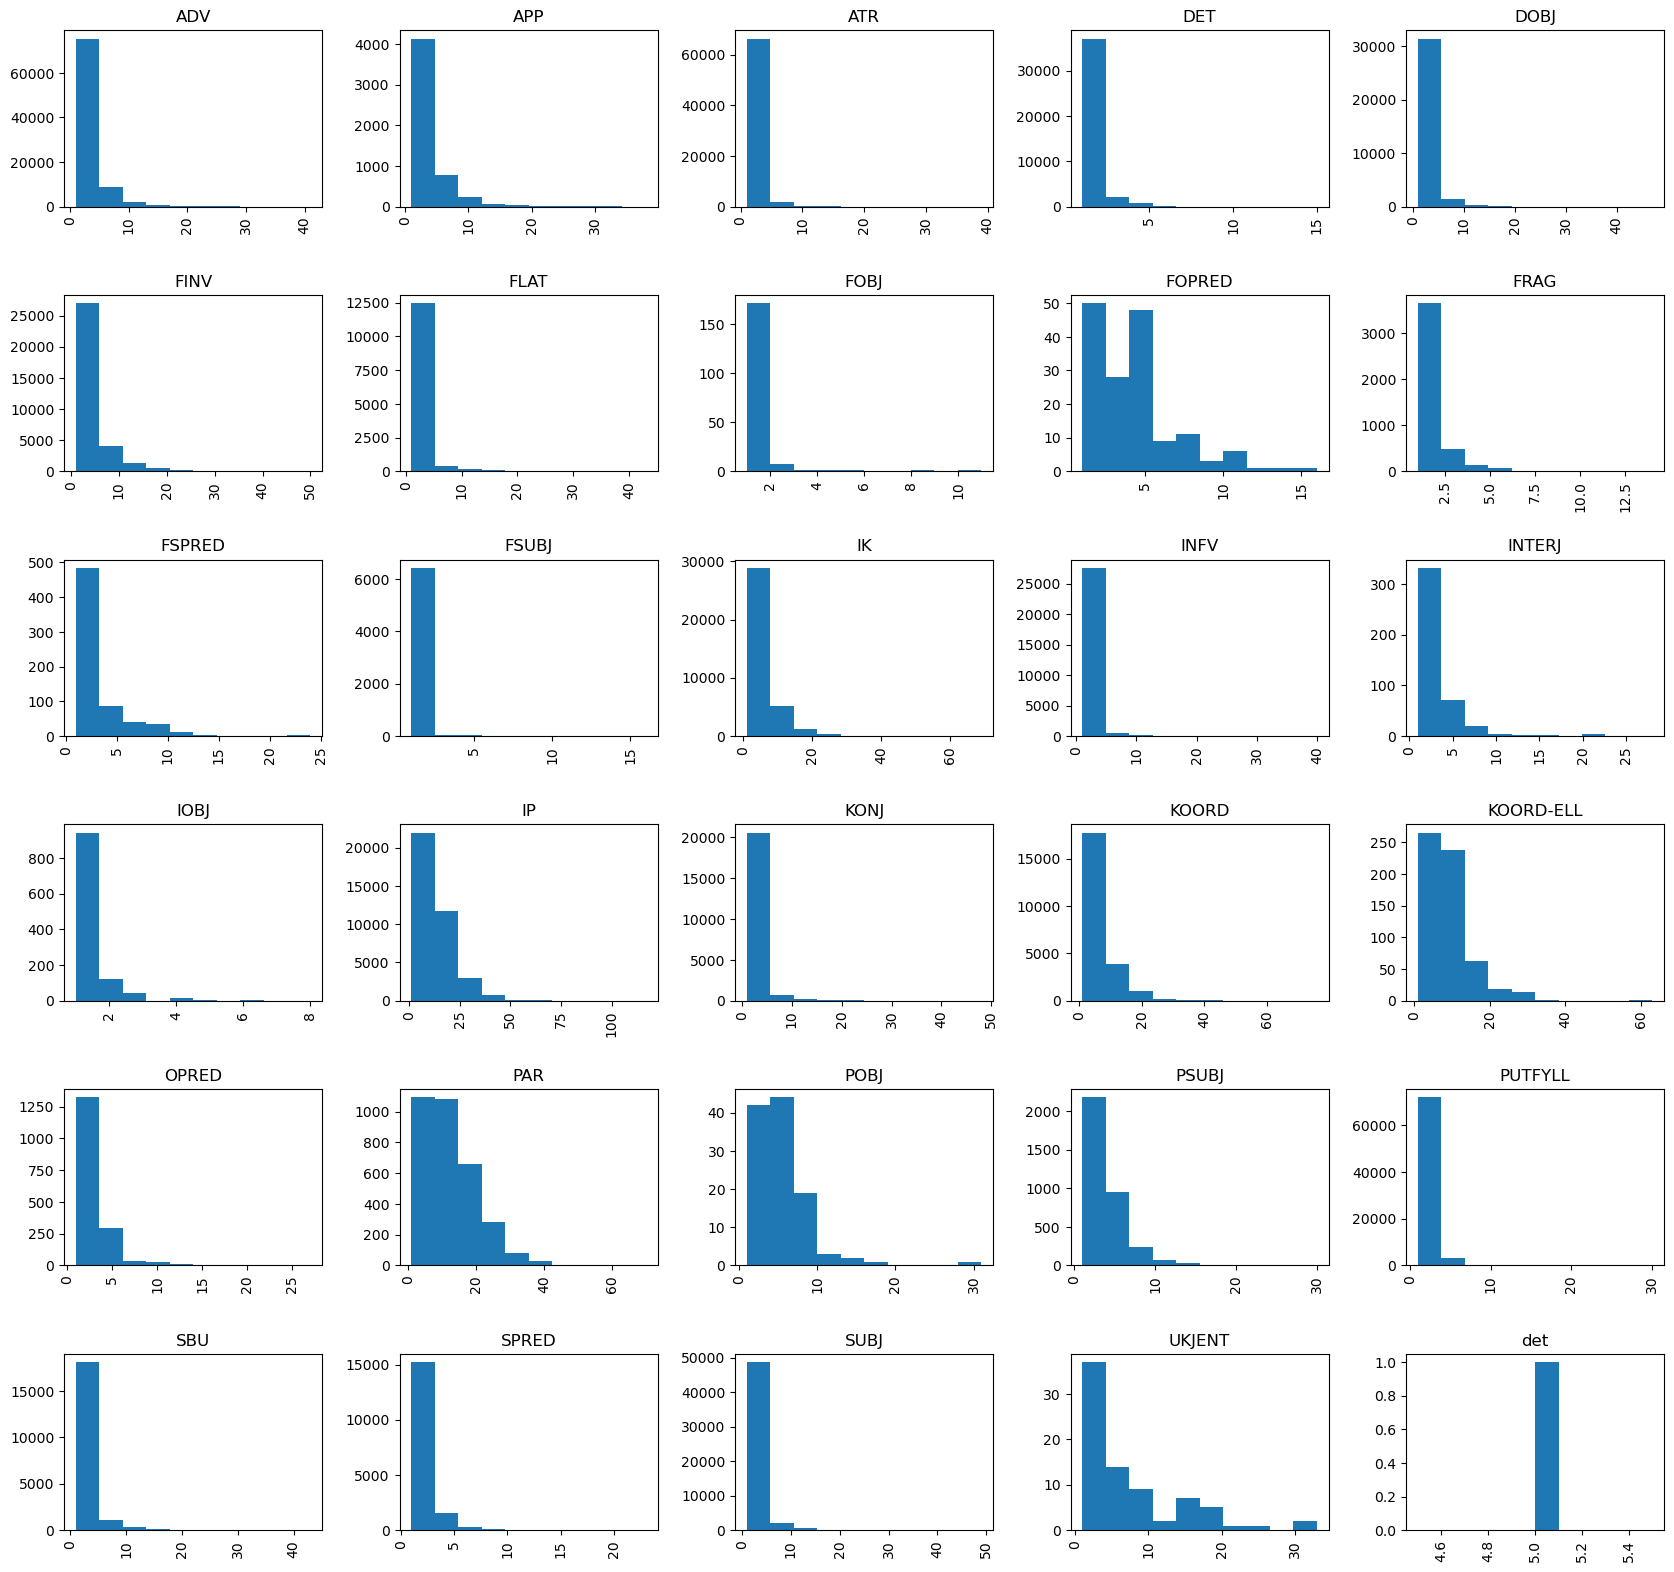

In [352]:
ndt[['deprel','diffs']].hist( by = 'deprel', figsize = (20,20));
#plt.savefig('ndt_distance.jpg')

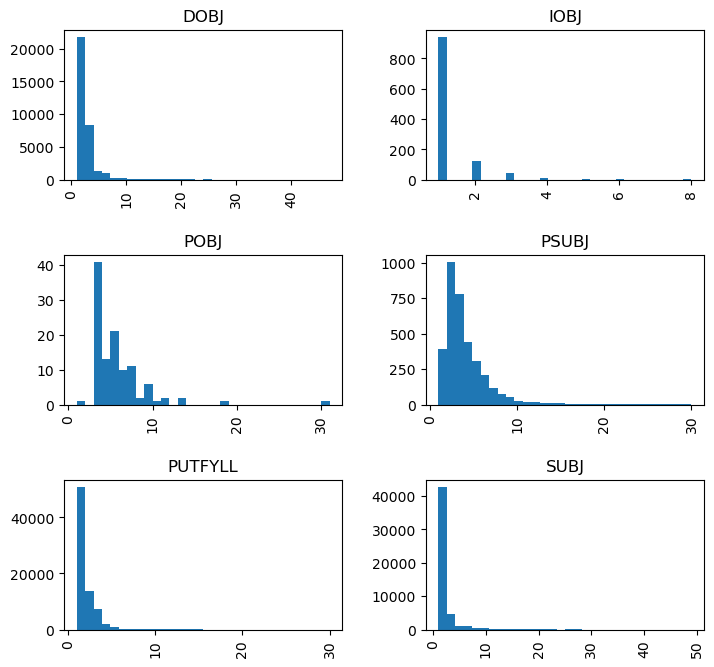

In [340]:
ndt_hist = ndt[['deprel','diffs']][ndt.deprel.isin(['SUBJ', 'DOBJ', 'IOBJ', 'PUTFYLL', 'POBJ', 'PSUBJ'])].hist(by = 'deprel', bins = 30, figsize = (8,8))
plt.savefig('ndt_distance3.jpg')

In [341]:
sentences = list({int(x) for x in ndt.sent_id.dropna()})

In [342]:
max(sentences)

37619

In [343]:
ff = dict()
lf = dict()
for i in sentences:
    ff[i] = ' '.join([str(x) for x in ndt[ndt.sent_id == i].form])
    lf[i] = ' '.join([str(x) for x in ndt[ndt.sent_id == i].lemma])

In [344]:
pd.concat([pd.DataFrame.from_dict(ff, orient='index', columns=["form"]),
           pd.DataFrame.from_dict(lf, orient='index', columns=["lemma"])],
         axis = 1).to_csv("NDT/setninger.csv", index=True)

In [290]:
import graphviz

In [347]:
edges = ndt[ndt.sent_id == 20000]["token_order head deprel".split()]
nodes = ndt[ndt.sent_id == 20000]["token_order form".split()]

edgelist = [(int(e[1]['head']), int(e[1].token_order), {'name':e[1].deprel}) for e in edges.iterrows()]
nodelist = [(int(e[1].token_order), {'name':e[1]['form']}) for e in nodes.iterrows()] 

edgelist



nodelist

import networkx as nx

G = nx.DiGraph()

G.add_edges_from(edgelist)
G.add_nodes_from(nodelist)

G.nodes[0]['name'] = 'root'

G.nodes(data=True)

#options = {"edgecolors": "tab:gray", "node_size": 200, "width":3, "alpha": 0.3}
#nx.draw_networkx(G, with_labels=True, **options)

import matplotlib

G.nodes(data=True)

edgelabels = {(x[0], x[1]):x[2]['name'] for x in G.edges(data=True)}
nodelabels = {x[0]:x[1]['name'] for x in G.nodes(data=True)}

13


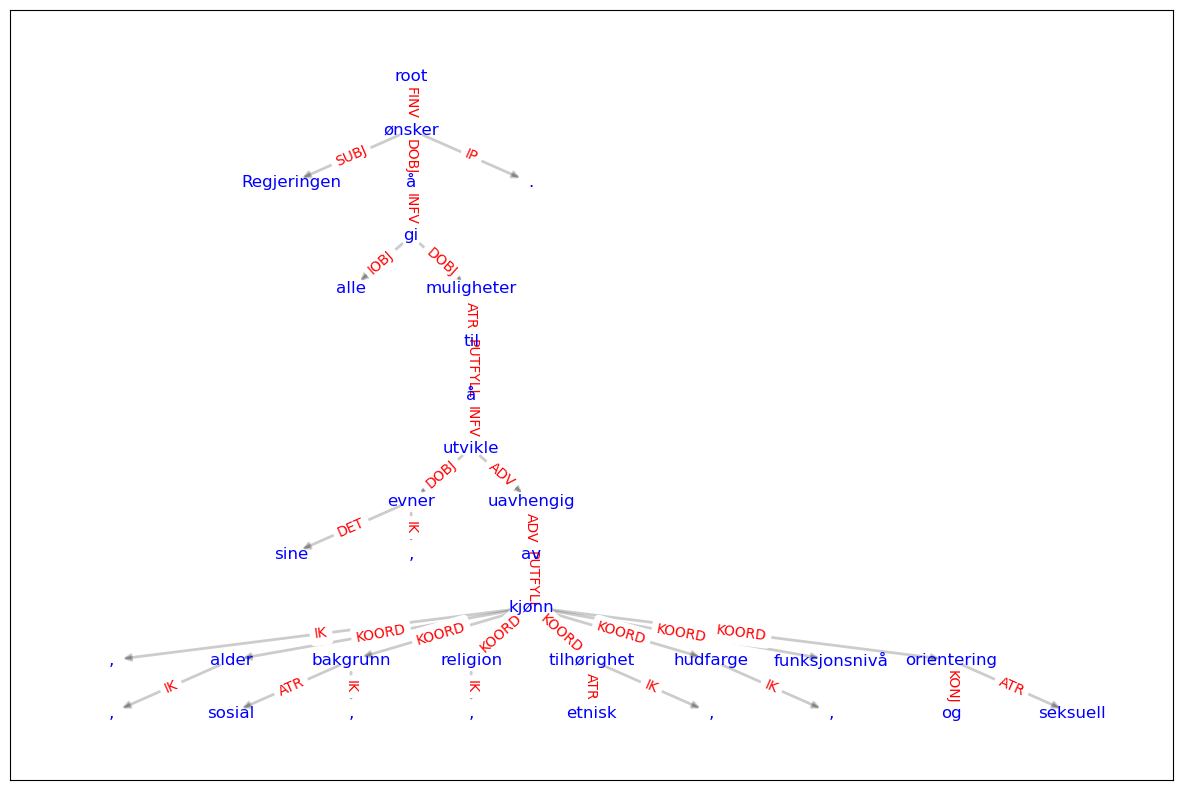

In [348]:
pos = nx.nx_agraph.graphviz_layout(G, prog="dot")  # positions for all nodes
#G.graph.setdefault('graph', {})['rankdir'] = 'BT'
n = nx.dag_longest_path(G)
print(len(n))
# nodes
options = {"edgecolors": "tab:gray", "node_size": 0, "alpha": 0.9}
# n1 = list(G.nodes)[:int(len(list(G.nodes))/2)]
# n2 = list(G.nodes)[int(len(list(G.nodes))/2):]
# nx.draw_networkx_nodes(G, pos,nodelist = n1, node_color="tab:red", **options)
# nx.draw_networkx_nodes(G, pos,nodelist = n2, node_color="tab:blue", **options)

# edges
nx.draw_networkx_edges(G, pos, width=2.0, alpha=0.2, arrows=True);
nx.draw_networkx_edge_labels(G, pos, edge_labels = edgelabels, font_color='red');
nx.draw_networkx_labels(G, pos, labels = nodelabels, font_color='blue');

In [262]:
sent = pd.read_csv("NDT/setninger.csv", index_col = 0)

In [289]:
list(sent[sent['form'].str.contains("lam")].sample(1).index)[0]

3286

In [319]:
for x in sent.loc[50]:
    print(x)

Ågot Valle blir ny leder av kontroll- og konstitusjonskomitéen .
Ågot Valle bli ny leder av kontroll- og konstitusjonskomité $.


In [358]:
 pd.DataFrame(ndt[ndt.language_code=="nb-NO"].groupby(['pos']).count()['language_code'])

,language_code
pos,
<anf>,2340
<komma>,11550
<parentes-beg>,603
<parentes-slutt>,604
<strek>,2553
adj,26809
adv,11996
clb,20365
det,20437
